# Divisibility by 3

Given an infinite stream of digits of a number, for each digit find if the resuktant number is divible by 3 or not.

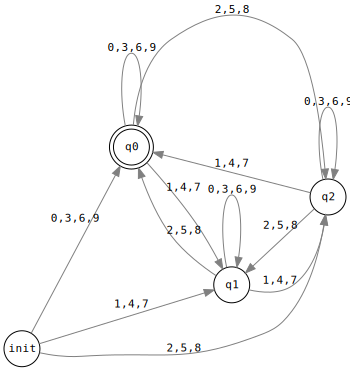

In [1]:
from graphviz import Source
with open("./div3.dot", "r") as f:
    gr = Source(f.read())
gr

In [2]:
def prime(fn):
    def wrapper(*args, **kwargs):
        v = fn(*args, **kwargs)
        v.send(None)
        return v
    return wrapper

In [3]:
class Divisibility3FSM:
    def __init__(self):
        self.current_state = None
        
        self.init = self._create_init()
        self.q0 = self._create_q0()
        self.q1 = self._create_q1()
        self.q2 = self._create_q2()
        
        self.current_state = self.init
        
    def send(self, digit):
        self.current_state.send(digit)
        
    def is_divisible(self):
        return self.current_state == self.q0

    @prime
    def _create_q0(self):
        while True:
            digit = yield
            if  digit in [0, 3, 6, 9]:
                self.current_state = self.q0
            elif  digit in [1, 4, 7]:
                self.current_state = self.q1
            elif  digit in [2, 5, 8]:
                self.current_state = self.q2

    @prime
    def _create_q1(self):
        while True:
            digit = yield
            if  digit in [0, 3, 6, 9]:
                self.current_state = self.q1
            elif  digit in [1, 4, 7]:
                self.current_state = self.q2
            elif  digit in [2, 5, 8]:
                self.current_state = self.q0

    @prime
    def _create_q2(self):
        while True:
            digit = yield
            if  digit in [0, 3, 6, 9]:
                self.current_state = self.q2
            elif  digit in [1, 4, 7]:
                self.current_state = self.q0
            elif  digit in [2, 5, 8]:
                self.current_state = self.q1

    @prime
    def _create_init(self):
        while True:
            digit = yield
            if  digit in [0, 3, 6, 9]:
                self.current_state = self.q0
            elif  digit in [1, 4, 7]:
                self.current_state = self.q1
            elif  digit in [2, 5, 8]:
                self.current_state = self.q2

In [4]:
import random

number = ""
evaluator = Divisibility3FSM()
for i in range(50):
    digit = random.randint(0, 9)
    number = str(digit) + number
    evaluator.send(digit)
    print(number, evaluator.is_divisible())

6 True
46 False
946 False
8946 True
88946 False
488946 True
8488946 False
48488946 True
648488946 True
8648488946 False
08648488946 False
408648488946 True
7408648488946 False
47408648488946 False
747408648488946 True
5747408648488946 False
45747408648488946 True
845747408648488946 False
8845747408648488946 False
98845747408648488946 False
398845747408648488946 False
3398845747408648488946 False
03398845747408648488946 False
003398845747408648488946 False
4003398845747408648488946 False
44003398845747408648488946 True
044003398845747408648488946 True
5044003398845747408648488946 False
25044003398845747408648488946 False
425044003398845747408648488946 False
6425044003398845747408648488946 False
66425044003398845747408648488946 False
266425044003398845747408648488946 False
4266425044003398845747408648488946 False
14266425044003398845747408648488946 True
514266425044003398845747408648488946 False
0514266425044003398845747408648488946 False
40514266425044003398845747408648488946 True
74051